In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 95x95 matrix of increased log odds of co-morbidity of condition i given condition j
vmat = pd.read_csv('https://raw.githubusercontent.com/aaronab/comorbidity_networks/master/comorbidity_odds_matrix.csv', index_col=0)
# 95x95 matrix of p-value from logistic regression
pmat = pd.read_csv('https://raw.githubusercontent.com/aaronab/comorbidity_networks/master/comorbidity_pmat_matrix.csv', index_col=0)

In [3]:
# change matplotlib colors
plt.rcParams["image.cmap"] = "Set2"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
plt.rcParams["font.family"] = "monospace"

In [4]:
def despine_axes(ax):
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

def plot_distribution(includeNonzero=False):
  # round to the third decimal place
  round_vmat = vmat.round(1)
  # count the occurrences of each rounded value
  value_counts = round_vmat.values.flatten()
  counts = pd.Series(value_counts).value_counts().sort_index()
  # ignore the zeros in the diagonal (no selfloops)
  counts[0] -= 95
  # include nonzero distribution
  if(includeNonzero):
    fig, (ax1, ax2) = plt.subplots(2, figsize = (5, 4))
    ax1.set_title('Distribution')
    despine_axes(ax1)
    ax1.bar(counts.index, counts.values, width=0.1)
    counts[0] = 0 # ignore all zeros
    ax2.set_title('Nonzero distribution')
    despine_axes(ax2)
    ax2.bar(counts.index, counts.values, width=0.1)
  # exclude nonzero distribution
  else:
    fig, ax1 = plt.subplots(1, figsize = (6, 2))
    ax1.set_title('Distribution')
    despine_axes(ax1)
    ax1.bar(counts.index, counts.values, width=0.1)
  plt.tight_layout()
  plt.show()

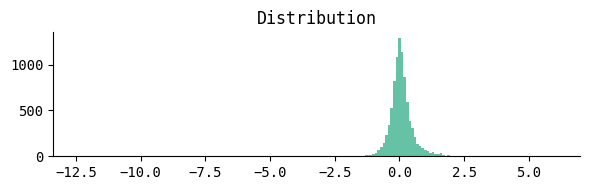

In [5]:
plot_distribution()

In [6]:
print('min = %.2f' % vmat.min().min())
print('max = %.2f' % vmat.max().max())
print('nonzero = %d' % (vmat != 0).sum().sum())
print('95x94 =', 95*94)

min = -12.36
max = 6.03
nonzero = 8930
95x94 = 8930


In [7]:
# remove values that are not statistically significative (p > 0.05)
print('removing %d values' % (pmat > 0.05).sum().sum())
mask = pmat <= 0.05
vmat = vmat[mask].fillna(0)

removing 2236 values


In [8]:
# remove negative values
print('removing %d values' % (vmat < 0).sum().sum())
vmat = vmat[vmat > 0].fillna(0)
# rationale:
# the scale is logarithmic: negative values correspond to odds increase between 0 and 1
# odds increase between 0 and 1 means that having condition j decreases the odds of having condition i

removing 2915 values


In [9]:
print('min = %.2f' % vmat.min().min())
print('max = %.2f' % vmat.max().max())
print('nonzero = %d' % (vmat != 0).sum().sum())
print('%%left = %.2f' % (int((vmat != 0).sum().sum())/(95*94)*100))

min = 0.00
max = 6.03
nonzero = 3779
%left = 42.32


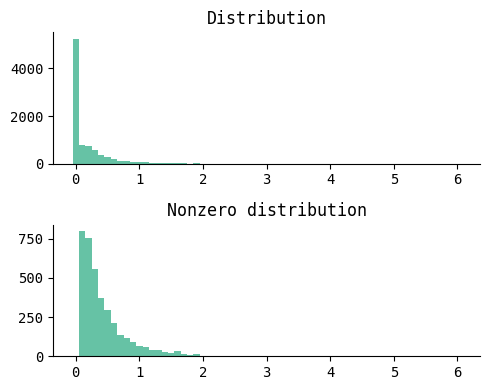

In [10]:
plot_distribution(includeNonzero=True)

In [11]:
vmat

,AHRQ_AbdominalHernia_DT,AHRQ_AcquiredDeformities_DT,AHRQ_AdjustmentDO_DT,AHRQ_Anemia_DT,AHRQ_Asthma_DT,AHRQ_AttentionDeficitDO_DT,AHRQ_BacterialInfection_DT,AHRQ_BiliaryTractDs_DT,AHRQ_Burns_DT,AHRQ_CNSInfection_DT,...,NEPEC_MDD_DT,NEPEC_AFBPDX_DT,NEPEC_PTSD_DT,NEPEC_DXODep_DT,NEPEC_ANXunsp_DT,NEPEC_ANXgen_DT,dmdxDT,cancerdxDT,anomdxDT,genitaldxDT
AHRQ_AbdominalHernia_DT,0.000000,0.000000,0.000000,0.090966,0.252191,0.000000,0.000000,0.710723,0.000000,0.000000,...,0.000000,0.193681,0.218394,0.566455,0.000000,0.0,0.000000,0.098747,0.000000,0.170254
AHRQ_AcquiredDeformities_DT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.465003,0.000000,...,0.000000,0.000000,0.234353,0.495289,0.000000,0.0,0.000000,0.000000,0.870268,0.000000
AHRQ_AdjustmentDO_DT,0.070200,0.138657,0.000000,0.000000,0.100560,0.000000,0.000000,0.000000,0.359342,0.000000,...,0.000000,0.000000,0.000000,1.008589,0.173898,0.0,0.000000,0.000000,0.000000,0.120009
AHRQ_Anemia_DT,0.168454,0.000000,0.000000,0.000000,0.000000,0.000000,0.603858,0.341700,0.314066,0.754466,...,0.000000,0.179997,0.000000,0.519196,0.000000,0.0,0.102596,0.148492,0.000000,0.164761
AHRQ_Asthma_DT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281069,0.000000,...,0.000000,0.246626,0.305148,0.590638,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEPEC_ANXgen_DT,0.123031,0.080503,0.206096,0.000000,0.131367,0.239518,0.000000,0.000000,0.000000,0.000000,...,0.391847,0.000000,0.156169,0.944590,1.080603,0.0,0.000000,0.000000,0.000000,0.110762
dmdxDT,0.000000,0.000000,0.000000,0.000000,0.163565,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.259720,0.205407,0.539875,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
cancerdxDT,0.445680,0.000000,0.000000,0.202946,0.000000,0.000000,0.000000,0.163758,0.000000,0.000000,...,0.000000,0.000000,0.138285,0.473643,0.000000,0.0,0.000000,0.000000,0.000000,0.478656
anomdxDT,0.140942,1.543945,0.040799,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.189222,0.483185,0.000000,0.0,0.000000,0.000000,0.000000,0.187030


In [12]:
from collections import namedtuple,defaultdict
import seaborn as sns
import networkx as nx
import math

In [13]:
G = nx.from_pandas_adjacency(vmat, create_using=nx.DiGraph)
print(G)
print()
print('directed =', nx.is_directed(G))
print('weighted =', nx.is_weighted(G))
print('nodes =', nx.number_of_nodes(G))
print('edges =', nx.number_of_edges(G))
print()
print('selfloops =', nx.number_of_selfloops(G))
print('WCCs =', nx.number_weakly_connected_components(G))
print('SCCs =', nx.number_strongly_connected_components(G))
print('density = %.2f' % nx.density(G))
print('3779/(95x95) = %.2f' % (3779/(95*95)))
out_degrees = [G.out_degree(n) for n in G.nodes]
print()
print('clustering = %.2f' % nx.average_clustering(G))
print('average shortest path = %.2f' % nx.average_shortest_path_length(G))
print('diameter =', nx.diameter(G))
print('assortativity = %.2f' % nx.degree_assortativity_coefficient(G))
print()
print('average out degree = %.2f' % np.mean(out_degrees))
print('min out degree =', np.min(out_degrees))
print('max out degree =', np.max(out_degrees))
print()
out_strengths = [G.out_degree(n, weight = 'weight') for n in G.nodes]
print('average out strength = %.2f' % np.mean(out_strengths))
print('min out strength = %.2f' % np.min(out_strengths))
print('max out strength = %.2f' % np.max(out_strengths))
in_degrees = [G.in_degree(n) for n in G.nodes]
print()
print('average in degree = %.2f' % np.mean(in_degrees))
print('min in degree =', np.min(in_degrees))
print('max in degree =', np.max(in_degrees))
print()
in_strengths = [G.in_degree(n, weight = 'weight') for n in G.nodes]
print('average in strength = %.2f' % np.mean(in_strengths))
print('min in strength = %.2f' % np.min(in_strengths))
print('max in strength = %.2f' % np.max(in_strengths))
print()
min_weight = float('inf')
for u, v, data in G.edges(data=True): min_weight = min(min_weight, data['weight'])
print('min weight = %.2f' % min_weight)
max_weight = float('-inf')
for u, v, data in G.edges(data=True): max_weight = max(max_weight, data['weight'])
print('max weight = %.2f' % max_weight)
print('average weight (G) = %.2f' % (sum(G.edges[edge]['weight'] for edge in G.edges) / G.number_of_edges()))
print('average weight (df) = %.2f' % vmat[vmat != 0].stack().mean())

DiGraph with 95 nodes and 3779 edges

directed = True
weighted = True
nodes = 95
edges = 3779

selfloops = 0
WCCs = 1
SCCs = 1
density = 0.42
3779/(95x95) = 0.42

clustering = 0.59
average shortest path = 1.61
diameter = 3
assortativity = -0.09

average out degree = 39.78
min out degree = 19
max out degree = 66

average out strength = 16.60
min out strength = 6.26
max out strength = 38.37

average in degree = 39.78
min in degree = 2
max in degree = 94

average in strength = 16.60
min in strength = 0.82
max in strength = 61.85

min weight = 0.02
max weight = 6.03
average weight (G) = 0.42
average weight (df) = 0.42


In [14]:
print('node? AbdominalHernia')
print(G.has_node('AHRQ_AbdominalHernia_DT'))
print()
print('edge? AbdominalHernia -> AcquiredDeformities')
print(G.has_edge('AHRQ_AbdominalHernia_DT', 'AHRQ_AcquiredDeformities_DT'))
print()
print('edge? AbdominalHernia -> Anemia')
print(G.has_edge('AHRQ_AbdominalHernia_DT', 'AHRQ_Anemia_DT'))
print(G.edges[('AHRQ_AbdominalHernia_DT', 'AHRQ_Anemia_DT')])
print()
print('out_degree(AbdominalHernia) =', G.out_degree('AHRQ_AbdominalHernia_DT'))
print('out_strength(AbdominalHernia) = %.2f' % G.out_degree('AHRQ_AbdominalHernia_DT', weight='weight'))

node? AbdominalHernia
True

edge? AbdominalHernia -> AcquiredDeformities
False

edge? AbdominalHernia -> Anemia
True
{'weight': 0.0909660098139276}

out_degree(AbdominalHernia) = 39
out_strength(AbdominalHernia) = 10.52


In [18]:
# top weighted edges
top_edges = sorted(G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)
top_edges = top_edges[:10]
for u, v, data in top_edges:
  print('%.2f\t' % data['weight'], u, '->', v)

6.03	 AHRQ_SpinalCordInjury_DT -> AHRQ_Paralysis_DT
5.00	 AHRQ_ImmunityDO_DT -> AHRQ_OthInfections_DT
5.00	 AHRQ_Paralysis_DT -> AHRQ_SpinalCordInjury_DT
3.81	 AHRQ_ChronicUlcerOfSkin_DT -> AHRQ_SpinalCordInjury_DT
3.39	 AHRQ_ChronicUlcerOfSkin_DT -> AHRQ_Paralysis_DT
3.02	 AHRQ_InfectiveArthritis_DT -> AHRQ_ChronicUlcerOfSkin_DT
2.91	 AHRQ_SpinalCordInjury_DT -> AHRQ_ChronicUlcerOfSkin_DT
2.84	 AHRQ_Paralysis_DT -> AHRQ_CerebrovascularDs_DT
2.65	 AHRQ_PathologicalFracture_DT -> AHRQ_Osteoporosis_DT
2.64	 AHRQ_BacterialInfection_DT -> AHRQ_InfectiveArthritis_DT


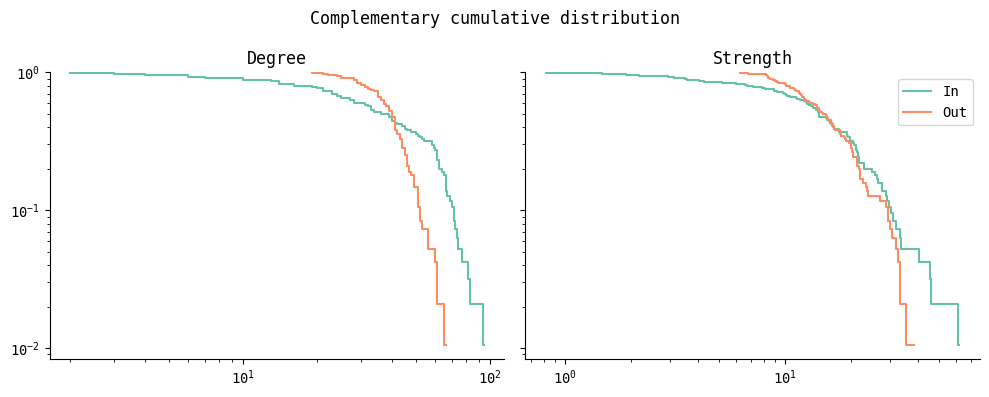

In [19]:
sns.set_palette('Set2')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
fig.suptitle('Complementary cumulative distribution')
ax1.set_title('Degree')
sns.ecdfplot(in_degrees, complementary = True, log_scale = (True, True), ax=ax1).set(ylabel=None)
sns.ecdfplot(out_degrees, complementary = True, log_scale = (True, True), ax=ax1).set(ylabel=None)
ax2.set_title('Strength')
sns.ecdfplot(in_strengths, complementary = True, log_scale = (True, True), ax=ax2)
sns.ecdfplot(out_strengths, complementary = True, log_scale = (True, True), ax=ax2)
ax2.legend(['In', 'Out'])
sns.despine()
plt.tight_layout()
plt.show()

In [20]:
# get the name of the condition without prefixes or suffizes
def clean_condition(name):
  return name.removeprefix('AHRQ_').removeprefix('NEPEC_').removesuffix('_DT').removesuffix('_D').removesuffix('_')

# get the names of psychiatric conditions
psy_indexes = [3,6,17, 18, 27, 39, 68 ,77 ,83 ,84 ,85, 86, 87, 88, 89, 90, 91] # from the paper
psy = []
for i, node in enumerate(G.nodes()):
  if i+1 in psy_indexes:
    psy.append(node)

# set a different color for psychiatric conditions
color_map = []
for node in G:
    if node in psy:
        color_map.append('blue')
    else:
        color_map.append('green')

# only label nodes with a high in degree
in_degree_treshold = 71
labels = {}
for node in G.nodes():
    if G.in_degree(node) > in_degree_treshold:
        labels[node] = clean_condition(node)

# set node size based on in degree
node_size_scale = 7
node_size = [node_size_scale * i for i in in_degrees]

# set edge width based on weight
edge_width_scale = 0.2
edge_width = [edge_width_scale * G[u][v]['weight'] for u, v in G.edges()]

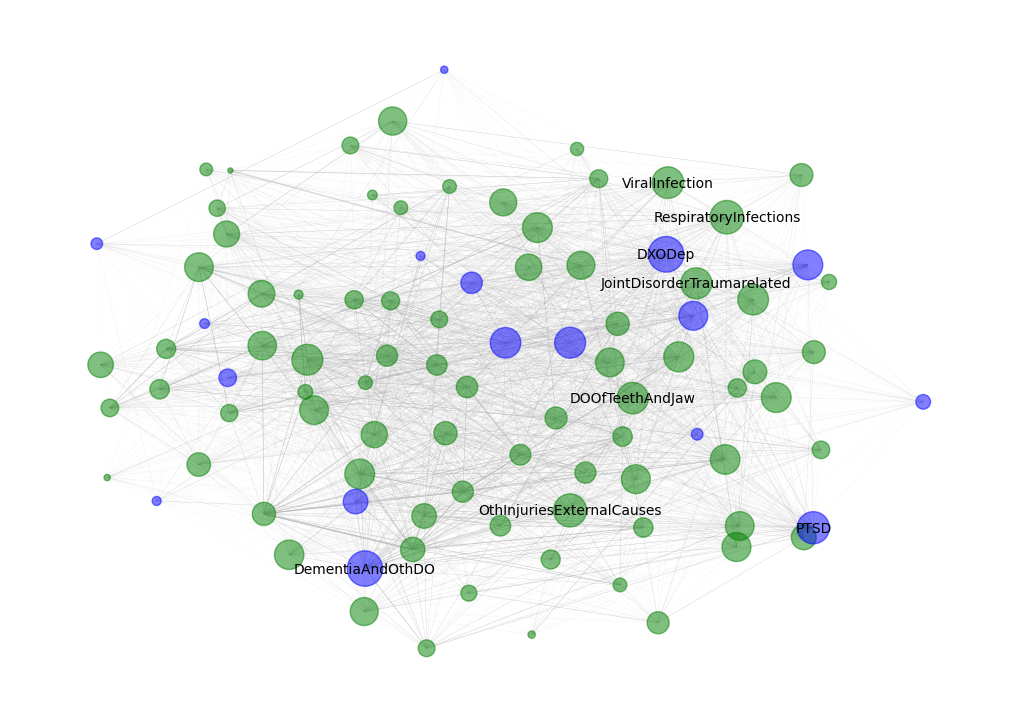

In [21]:
plt.figure(figsize =(10, 7))

k=10/math.sqrt(G.order()) # distance between nodes
pos = nx.spring_layout(G, k=k) # spring_layout, circular_layout, random_layout
nx.draw(G, pos,
        node_size = node_size,
        node_color = color_map,
        arrows = False,
        alpha = 0.5,
        width = edge_width,
        edge_color ='.7'
        )

# add labels
nx.draw_networkx_labels(G,pos,labels,font_size=10,font_color='black',alpha=1)

plt.show()

In [22]:
# compute centrality measures
centralities = {'in_degree_centrality': nx.in_degree_centrality(G),
                'out_degree_centrality': nx.out_degree_centrality(G),
                'eigenvector_centrality': nx.eigenvector_centrality(G),
                'katz_centrality': nx.katz_centrality_numpy(G, weight= 'weight'),
                'closeness_centrality': nx.closeness_centrality(G),
                'betweenness_centrality': nx.betweenness_centrality(G)
                }
# print centrality properties
for name, centrality in centralities.items():
  print(name)
  print('\tmin = %.2f' % min(centrality.values()))
  print('\tmax = %.2f' % max(centrality.values()))
  print('\taverage = %.2f' % np.mean(list(centrality.values())))
  sorted_centrality = sorted(centrality.items(), key=lambda x:x[1], reverse=True)
  top_keys = [clean_condition(x[0]) for x in sorted_centrality[:3]]
  print('\ttop = ', top_keys)

in_degree_centrality
	min = 0.02
	max = 1.00
	average = 0.42
	top =  ['DXODep', 'DementiaAndOthDO', 'RespiratoryInfections']
out_degree_centrality
	min = 0.20
	max = 0.70
	average = 0.42
	top =  ['DisOfTheUrinarySystem', 'DisOfArteries', 'DisOfTheHeart']
eigenvector_centrality
	min = 0.00
	max = 0.19
	average = 0.09
	top =  ['DXODep', 'DementiaAndOthDO', 'OthInjuriesExternalCauses']
katz_centrality
	min = -0.16
	max = 0.31
	average = 0.01
	top =  ['PancreaticDO', 'FluidAndElectrolyteDO', 'NoninfectiousGastroenterit0']
closeness_centrality
	min = 0.36
	max = 1.00
	average = 0.64
	top =  ['DXODep', 'DementiaAndOthDO', 'RespiratoryInfections']
betweenness_centrality
	min = 0.00
	max = 0.02
	average = 0.01
	top =  ['DXDRG', 'OthInjuriesExternalCauses', 'PersonalityDO']
